In [1]:

import sys
import operator
import argparse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import binom_test

In [2]:
def filter_file(read_file,write_file_true,write_file_fake):
    last_fake = -5
    last_true = -5
    line_count = 0

    for line in read_file:
        if line_count == 4:
            last_true = line_count
            write_file_true.write(line)
        if line_count == 5:
            last_fake = line_count
            write_file_fake.write(line)
        if line_count - last_true == 9:
            write_file_true.write(line)
            last_true = line_count
        if line_count - last_fake == 9:
            write_file_fake.write(line)
            last_fake = line_count
        line_count = line_count + 1

        
def filter_file_noadv(read_file,write_file_true,write_file_fake):
    last_fake = -5
    last_true = -5
    line_count = 0

    for line in read_file:
        if line_count == 2:
            last_true = line_count
            write_file_true.write(line)
        if line_count == 3:
            last_fake = line_count
            write_file_fake.write(line)
        if line_count - last_true == 7:
            write_file_true.write(line)
            last_true = line_count
        if line_count - last_fake == 7:
            write_file_fake.write(line)
            last_fake = line_count
        line_count = line_count + 1
        

In [4]:
#filter file
file_name = 'test_out_20samples.txt'
out_true_file_name = 'test_out_20samples_true.txt'
out_fake_file_name = 'test_out_20samples_fake.txt'

read_file = open(file_name, encoding="utf8",mode='r')
write_file_true = open(out_true_file_name, encoding="utf8",mode='w')
write_file_fake = open(out_fake_file_name, encoding="utf8",mode='w')

filter_file(read_file,write_file_true,write_file_fake)

write_file_true.close()
write_file_fake.close()
read_file.close()


file_name = 'val_out_20samples.txt'
out_true_file_name = 'val_out_20samples_true.txt'
out_fake_file_name = 'val_out_20samples_fake.txt'

read_file = open(file_name, encoding="utf8",mode='r')
write_file_true = open(out_true_file_name, encoding="utf8",mode='w')
write_file_fake = open(out_fake_file_name, encoding="utf8",mode='w')

filter_file(read_file,write_file_true,write_file_fake)

write_file_true.close()
write_file_fake.close()
read_file.close()


file_name = 'test_out_noadv.txt'
out_true_file_name = 'test_out_noadv_true.txt'
out_fake_file_name = 'test_out_noadv_fake.txt'

read_file = open(file_name, encoding="utf8",mode='r')
write_file_true = open(out_true_file_name, encoding="utf8",mode='w')
write_file_fake = open(out_fake_file_name, encoding="utf8",mode='w')

filter_file_noadv(read_file,write_file_true,write_file_fake)

write_file_true.close()
write_file_fake.close()
read_file.close()


file_name = 'val_out_noadv.txt'
out_true_file_name = 'val_out_noadv_true.txt'
out_fake_file_name = 'val_out_noadv_fake.txt'

read_file = open(file_name, encoding="utf8",mode='r')
write_file_true = open(out_true_file_name, encoding="utf8",mode='w')
write_file_fake = open(out_fake_file_name, encoding="utf8",mode='w')

filter_file_noadv(read_file,write_file_true,write_file_fake)

write_file_true.close()
write_file_fake.close()
read_file.close()



In [5]:
def word_freq(filename,doc=None):
    if doc == None:
        doc = {}
    for line in open(filename, encoding="utf8",mode='r'):
        split = line.rstrip().split(' ')
        for entry in split:
            if (doc.__contains__(entry)):
                doc[entry] = int(doc.get(entry)) + 1
            else:
                doc[entry] = 1
    return doc
    

In [6]:
orig_doc = word_freq('val_out_20samples_true.txt')
orig_doc = word_freq('test_out_20samples_true.txt',orig_doc)
orig_doc_sorted = (sorted(orig_doc.items(), key = operator.itemgetter(1)))[::-1]

edited_doc_best =  word_freq('val_out_20samples_fake.txt')
edited_doc_best = word_freq('test_out_20samples_fake.txt',edited_doc_best)
edited_doc_best_sorted =  (sorted(edited_doc_best.items(), key = operator.itemgetter(1)))[::-1]

edited_doc_noadv =  word_freq('val_out_noadv_fake.txt')
edited_doc_noadv = word_freq('test_out_noadv_fake.txt',edited_doc_noadv)
edited_doc_noadv_sorted =  (sorted(edited_doc_noadv.items(), key = operator.itemgetter(1)))[::-1]

In [7]:
def get_words_occur(input_dict):
    entry_num = 1
    words = []
    rank = []
    occur  = []
    for entry in input_dict:
        rank.append(entry_num)
        entry_num += 1
        occur.append(entry[1])
        words.append(entry[0])
    return words,rank,occur


words_best,rank_best,occur_best = get_words_occur(edited_doc_best_sorted)
#words_greedy,rank_greedy,occur_greedy = get_words_occur(edited_doc_greedy_sorted)
words_noadv,rank_noadv,occur_noadv = get_words_occur(edited_doc_noadv_sorted)
words_orig,rank_orig,occur_orig = get_words_occur(orig_doc_sorted)


In [8]:
def find_occur_of_top_in_x(words_orig,words_x,limit,occur_x):
    occur_of_top_orig_in_x = []
    for word in words_orig[0:limit]:
        count = 0
        found = 0
        for word_edited in words_x:
            if word == word_edited:
                occur_of_top_orig_in_x.append(occur_x[count])
                found = 1
                break
            count = count + 1
        if found == 0:
            occur_of_top_orig_in_x.append(0)
            print(word)
    return occur_of_top_orig_in_x

limit = 40
occur_of_top_orig_in_best = find_occur_of_top_in_x(words_orig,words_best,limit,occur_best)
#occur_of_top_orig_in_greedy = find_occur_of_top_in_x(words_orig,words_greedy,limit,occur_greedy)
occur_of_top_orig_in_noadv = find_occur_of_top_in_x(words_orig,words_noadv,limit,occur_noadv)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


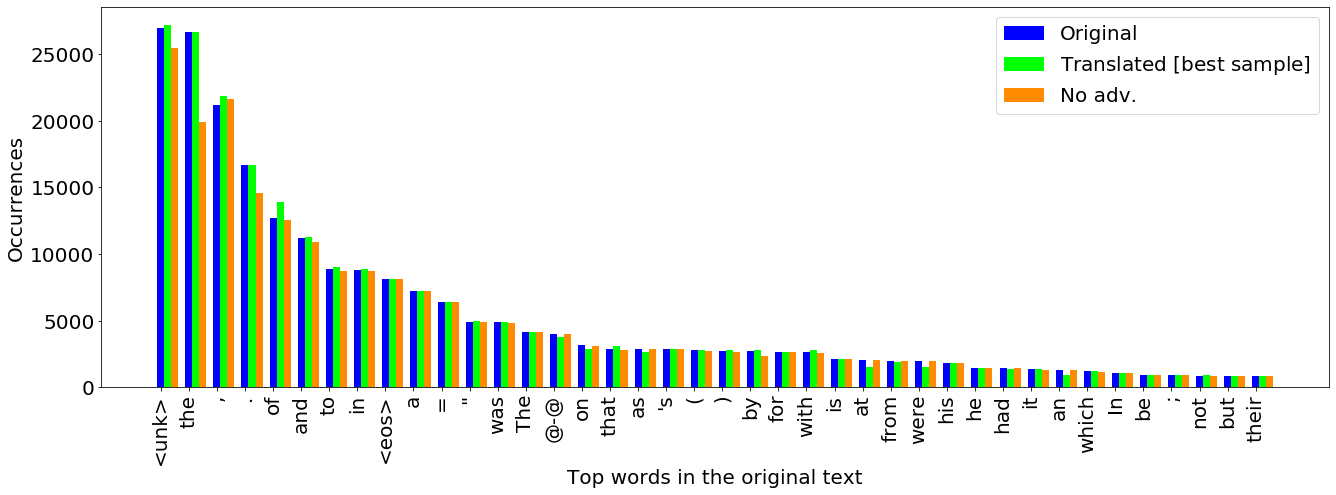

In [9]:
plt.figure(figsize=(22, 7))
matplotlib.rcParams.update({'font.size': 20})

barWidth = 0.25
# Set position of bar on X axis
r1 = np.arange(0,limit)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]


plt.bar(r1,occur_orig[0:limit],width=barWidth, label='Original', color='blue')
plt.bar(r2,occur_of_top_orig_in_best[0:limit],width=barWidth, label='Translated $[$best sample$]$', color='lime')
#plt.bar(r3,occur_of_top_orig_in_greedy[0:limit],width=barWidth, label='Greedy',color='tab:blue')
plt.bar(r3,occur_of_top_orig_in_noadv[0:limit],width=barWidth, label='No adv.', color='darkorange')

plt.xlabel('Top words in the original text')
plt.ylabel('Occurrences')
plt.xticks(np.arange(0,limit), words_orig[0:limit], rotation=90)

ax = plt.subplot(111)

ax.legend(loc='upper')


In [10]:
limit = 40
occur_of_top_noadv_in_best = find_occur_of_top_in_x(words_noadv,words_best,limit,occur_best)
occur_of_top_noadv_in_orig = find_occur_of_top_in_x(words_noadv,words_orig,limit,occur_orig)


Bunbury
Ashurbanipal
Bunbury
Ashurbanipal


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


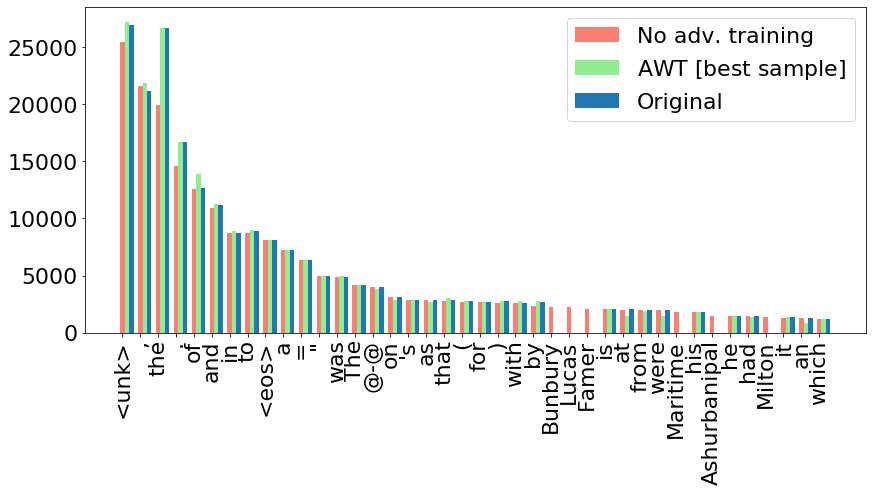

In [11]:
plt.figure(figsize=(14, 6))
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


barWidth = 0.25
# Set position of bar on X axis
r1 = np.arange(0,limit)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



plt.bar(r1,occur_noadv[0:limit],width=barWidth, label='No adv. training',color='salmon')
plt.bar(r2,occur_of_top_noadv_in_best[0:limit],width=barWidth, label='AWT $[$best sample$]$',color='lightgreen')
plt.bar(r3,occur_of_top_noadv_in_orig[0:limit],width=barWidth, label='Original')

#plt.xlabel('Top words in \"No adv.\" model\'s output')
#plt.ylabel('Occurrences')
plt.xticks(np.arange(0,limit), words_noadv[0:limit], rotation=90)

ax = plt.subplot(111)

ax.legend(loc='upper')

plt.savefig("words_histograms.pdf", bbox_inches='tight')
plt.show()